# Tutorial 5 

## Exercice 1: Alarm bound
answer given by teacher

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib notebook

In [7]:
mu = 34
sigma = 5
alpha = 0.01

### Plot the probability density : `[scipy].stats.norm.pdf()`

<IPython.core.display.Javascript object>


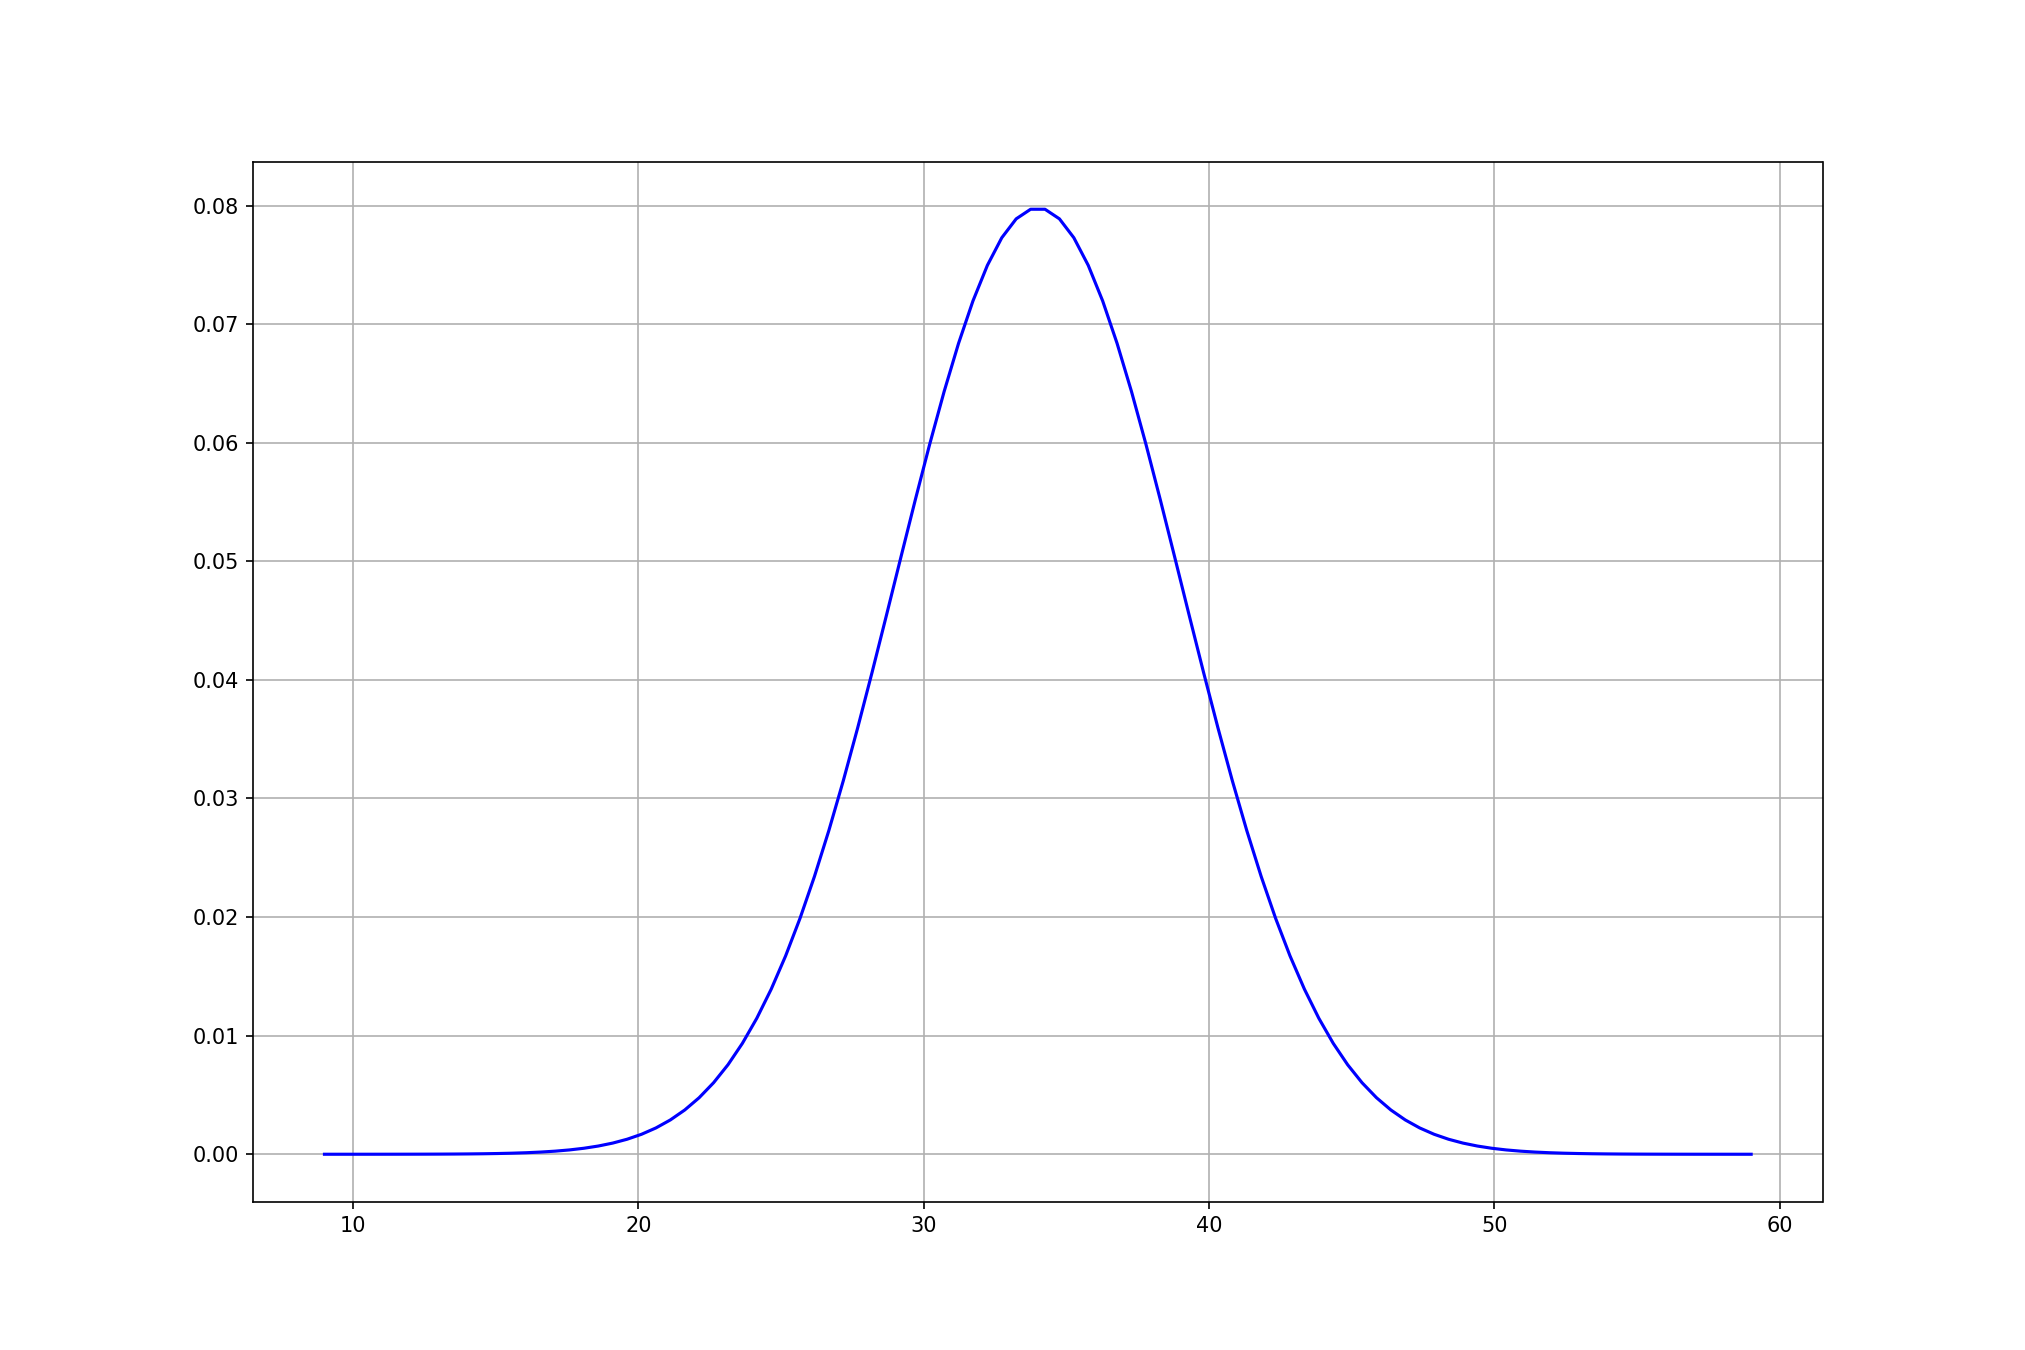

In [8]:
vX = np.linspace(mu-5*sigma, mu+5*sigma, 100)
fig = plt.figure(figsize=(9, 6))
ax =  fig.add_subplot(1, 1, 1)
ax.plot(vX, stats.norm.pdf(vX, loc=mu, scale=sigma), 'b')
ax.grid(True)

### Calculation of the inverse of the cumulative:  `[scipy].stats.norm.ppf()`

In [9]:
x_min = stats.norm.ppf(alpha/2, loc=mu, scale=sigma)
x_max = stats.norm.ppf(1-alpha/2, loc=mu, scale=sigma)
print('x_min={:.2f}\nx_max={:.2f}\n'.format(x_min, x_max))

x_min=21.12
x_max=46.88



<IPython.core.display.Javascript object>


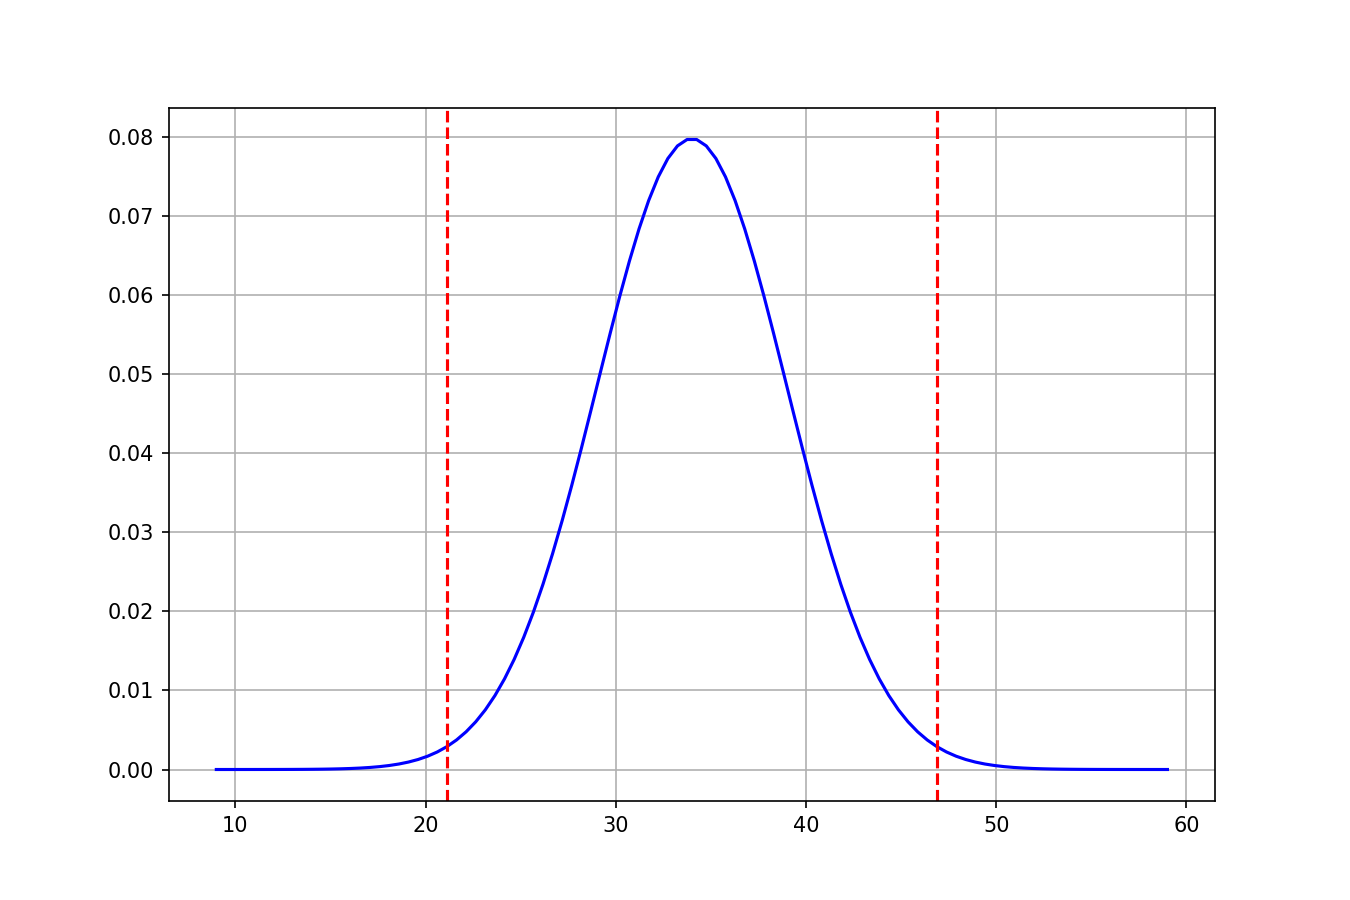

In [10]:
fig = plt.figure(figsize=(9, 6))
ax =  fig.add_subplot(1, 1, 1)
ax.plot(vX, stats.norm.pdf(vX, loc=mu, scale=sigma), 'b')
ylim = ax.get_ylim()
ax.plot([x_min, x_min], ylim, 'r--')
ax.plot([x_max, x_max], ylim, 'r--')
ax.set_ylim(ylim)
ax.grid(True)

## Exercice 2: Neyman-Pearson

In [12]:
lambda0 = 1e-4
lambda1 = 1e-3
alpha = 0.05

### Plot the probability densities : `[scipy].stats.expon.pdf()`

<IPython.core.display.Javascript object>


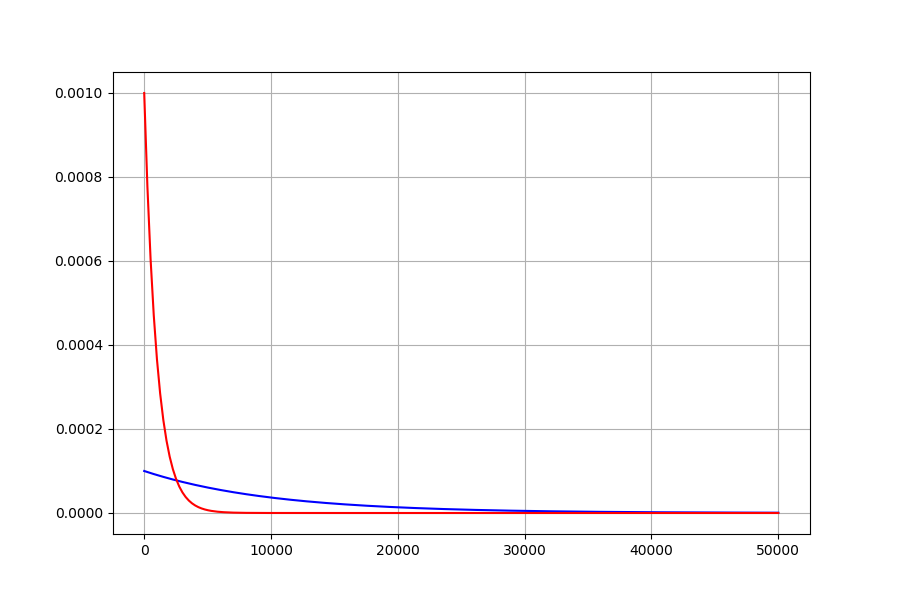

In [13]:
vX = np.linspace(0, 5e4, 200)
fig = plt.figure(figsize=(9, 6))
ax0 =  fig.add_subplot(1, 1, 1)
ax0.plot(vX, stats.expon.pdf(vX, scale=1/lambda0), 'b')
ax0.plot(vX, stats.expon.pdf(vX, scale=1/lambda1), 'r')
ax0.grid(True)

## Calculation of $\lambda_np$ (analytical development)

In [14]:
lambdanp = np.exp((lambda1-lambda0)/lambda0*np.log(1-alpha)+np.log(lambda1/lambda0))
lambdanp

6.302494097246091

<IPython.core.display.Javascript object>


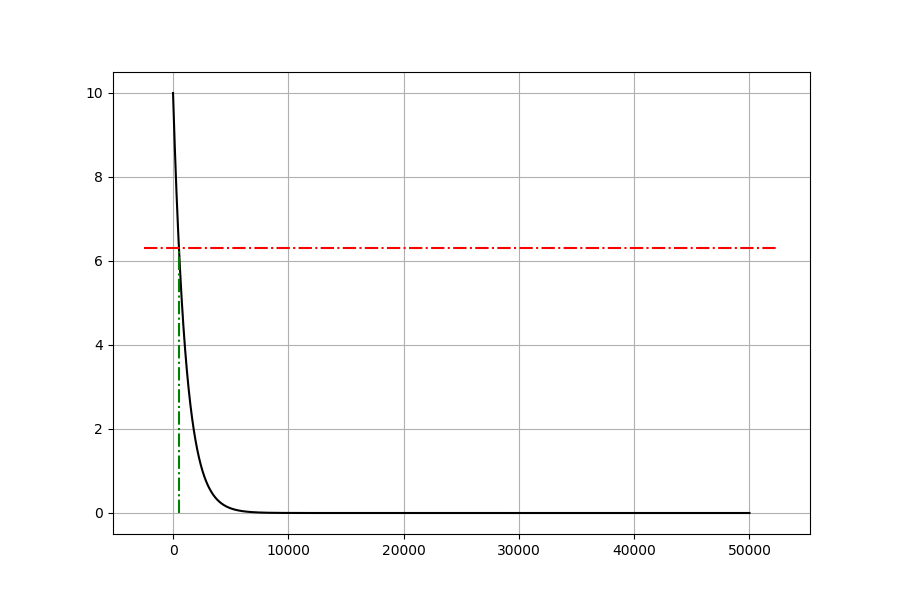

x_np=512.90



In [15]:
vX = np.linspace(0, 5e4, 1000000)
fig = plt.figure(figsize=(9, 6))
ax0 =  fig.add_subplot(1, 1, 1)
ax0.plot(vX, stats.expon.pdf(vX, scale=1/lambda1)/stats.expon.pdf(vX, scale=1/lambda0), 'k')
xlim = ax0.get_xlim()
ax0.plot(xlim, [lambdanp, lambdanp], 'r-.')
ax0.grid(True)
x_np = np.max(vX[stats.expon.pdf(vX, scale=1/lambda1)/stats.expon.pdf(vX, scale=1/lambda0)>=lambdanp])
ylim = ax0.get_ylim()
ax0.plot([x_np, x_np], [0, lambdanp], 'g-.')
print('x_np={:.2f}\n'.format(x_np))

## Calculation of $x_{np}$ (Bound alarm approach)

In [16]:
x_np = stats.expon.ppf(alpha, scale=1/lambda0)
print('x_np={:.2f}\n'.format(x_np))

x_np=512.93



<IPython.core.display.Javascript object>


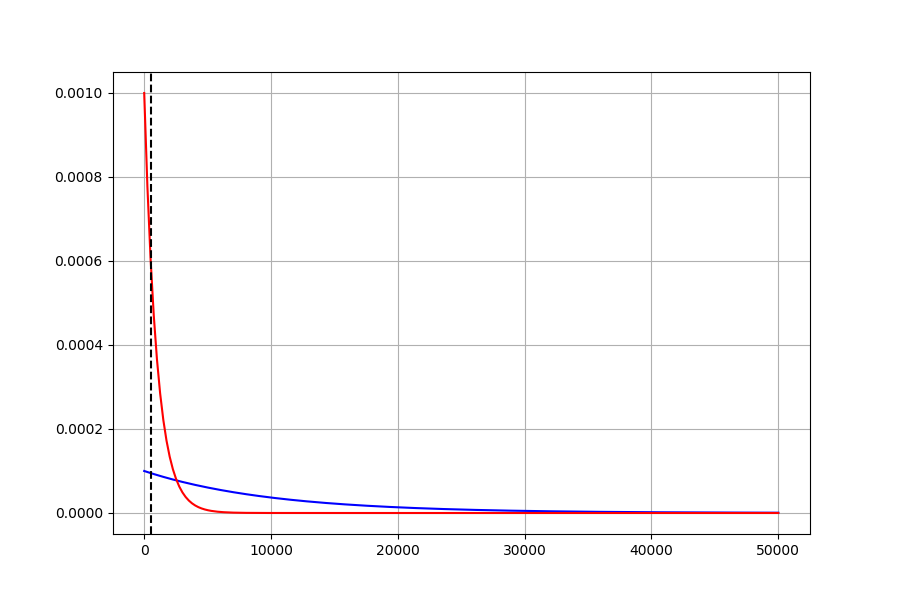

In [17]:
vX = np.linspace(0, 5e4, 200)
fig = plt.figure(figsize=(9, 6))
ax0 =  fig.add_subplot(1, 1, 1)
ax0.plot(vX, stats.expon.pdf(vX, scale=1/lambda0), 'b')
ax0.plot(vX, stats.expon.pdf(vX, scale=1/lambda1), 'r')
ylim = ax0.get_ylim()
ax0.plot([x_np, x_np], ylim, 'k--')
ax0.set_ylim(ylim)
ax0.grid(True)
